# Decision Tree for Predictive Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Configure settings
warnings.filterwarnings("ignore")
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("supermarket_sale.csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

In [7]:
data.shape

(1000, 17)

In [8]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

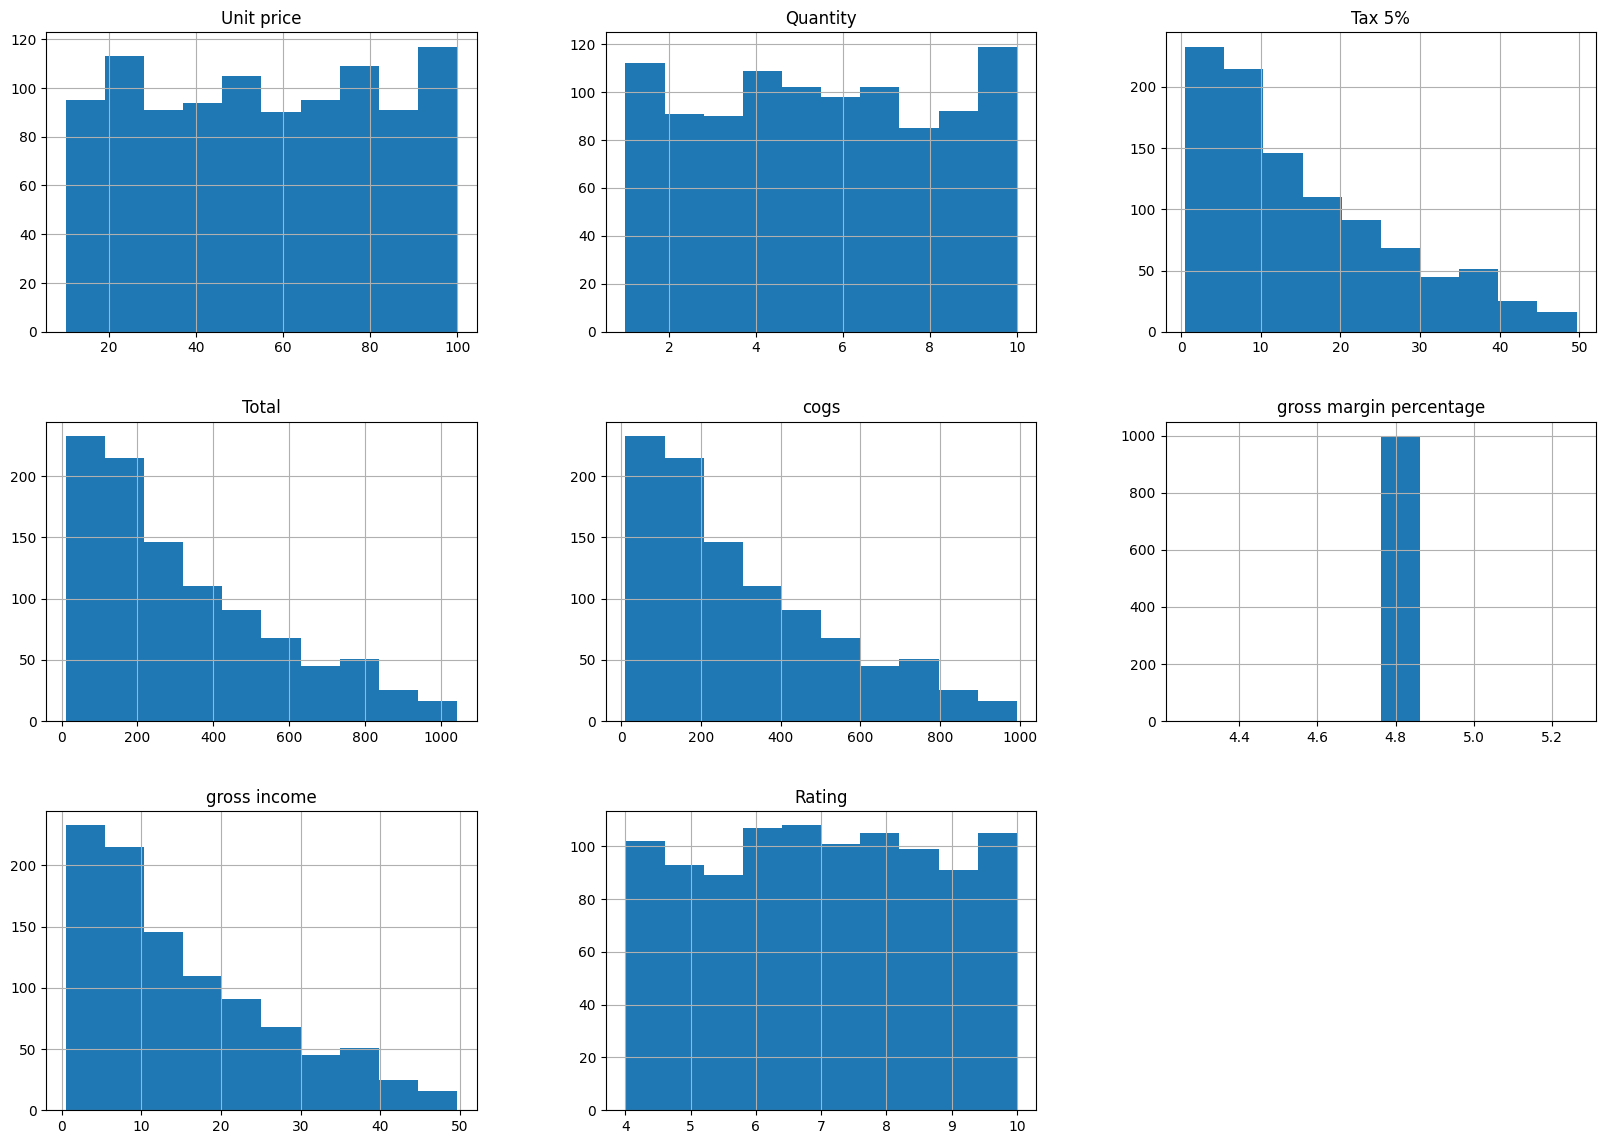

In [11]:
data.hist(figsize=(20,14))
plt.show()

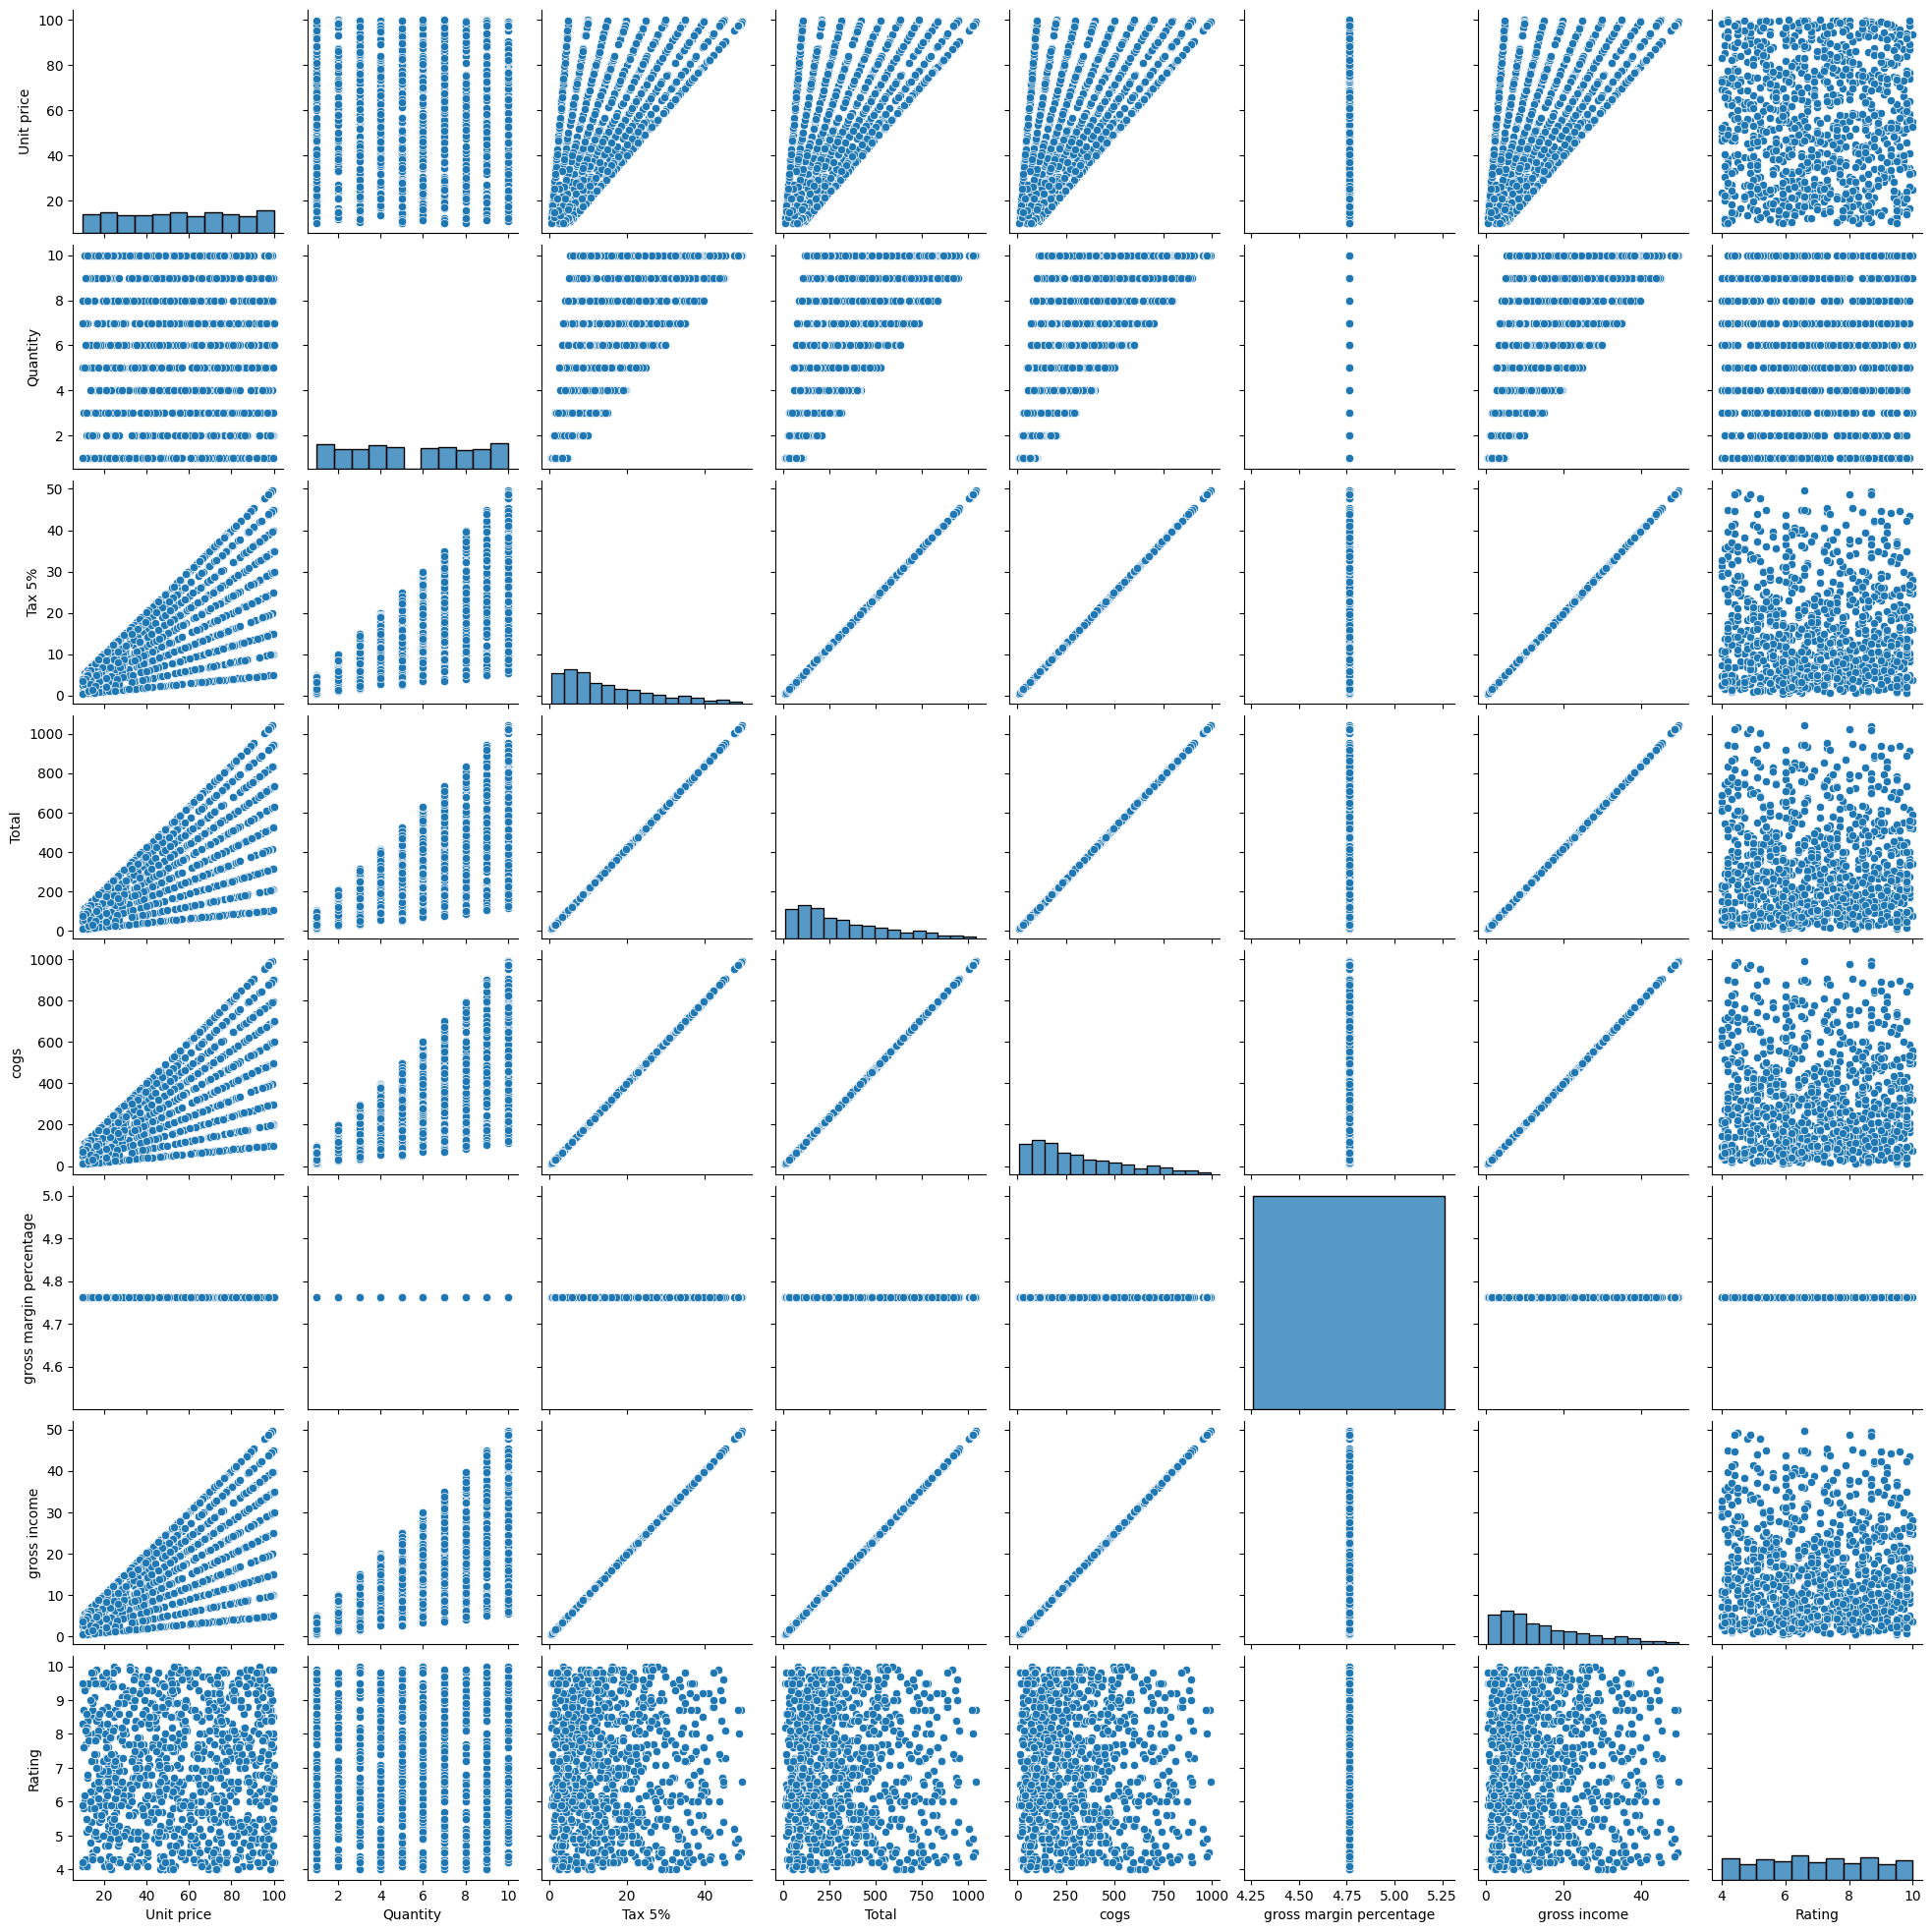

In [13]:
sns.pairplot(data=data)

In [45]:
list_1=list(data.columns)
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    data[i]=le.fit_transform(data[i])
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [46]:
y=data['Gender']
x=data.drop('Gender',axis=1)

In [47]:
y.head(2)

0    0
1    0
Name: Gender, dtype: int32

In [48]:
x.head(2)

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [51]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       100
           1       0.56      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.53      0.50       200

Confusion Matrix:
 [[79 21]
 [73 27]]
Training Score:
 63.87500000000001


In [52]:
from sklearn.tree import DecisionTreeClassifier

# Create and train your Decision Tree model
model = DecisionTreeClassifier(max_depth=6, random_state=123, criterion='entropy')
model.fit(x_train, y_train)

# Print hyperparameters
print("Hyperparameters:", model.get_params())

# Calculate the training score
training_score = model.score(x_train, y_train)
print("Training Score:", training_score)


Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
Training Score: 0.63875


In [53]:
model.score(x_test,y_test)

0.53

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision Score: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}%".format(recall * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=5))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Precision Score: 56.25%
Recall Score: 27.00%
Accuracy: 53.00%
F1 Score: 36.49%
Classification Report:
              precision    recall  f1-score   support

           0    0.51974   0.79000   0.62698       100
           1    0.56250   0.27000   0.36486       100

    accuracy                        0.53000       200
   macro avg    0.54112   0.53000   0.49592       200
weighted avg    0.54112   0.53000   0.49592       200

Confusion Matrix:
[[79 21]
 [73 27]]


In [55]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=0.1, min_samples_leaf=1, min_weight_fraction_leaf=0.3, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision Score: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}%".format(recall * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=5))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Precision Score: 50.00%
Recall Score: 59.00%
Accuracy: 50.00%
F1 Score: 54.13%
Classification Report:
              precision    recall  f1-score   support

           0    0.50000   0.41000   0.45055       100
           1    0.50000   0.59000   0.54128       100

    accuracy                        0.50000       200
   macro avg    0.50000   0.50000   0.49592       200
weighted avg    0.50000   0.50000   0.49592       200

Confusion Matrix:
[[41 59]
 [41 59]]


In [56]:
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("pricison_score: ",precision_score(y_test, y_pred)*100,"%")
print("recall_score: ",recall_score(y_test, y_pred)*100,"%")
print("Accuracy = {}".format(accuracy*100),"%")
print(classification_report(y_test,y_pred,digits=5))
print(confusion_matrix(y_test,y_pred))
print("="*70)
print("f1_score: ",f1_score(y_test,y_pred)*100,"%")

pricison_score:  50.0 %
recall_score:  53.0 %
Accuracy = 50.0 %
              precision    recall  f1-score   support

           0    0.50000   0.47000   0.48454       100
           1    0.50000   0.53000   0.51456       100

    accuracy                        0.50000       200
   macro avg    0.50000   0.50000   0.49955       200
weighted avg    0.50000   0.50000   0.49955       200

[[47 53]
 [47 53]]
f1_score:  51.45631067961165 %


In [57]:
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("pricison_score: ",precision_score(y_test, y_pred)*100,"%")
print("recall_score: ",recall_score(y_test, y_pred)*100,"%")
print("Accuracy = {}".format(accuracy*100),"%")
print(classification_report(y_test,y_pred,digits=5))
print(confusion_matrix(y_test,y_pred))
print("="*70)
print("f1_score: ",f1_score(y_test,y_pred)*100,"%")

pricison_score:  58.490566037735846 %
recall_score:  31.0 %
Accuracy = 54.50000000000001 %
              precision    recall  f1-score   support

           0    0.53061   0.78000   0.63158       100
           1    0.58491   0.31000   0.40523       100

    accuracy                        0.54500       200
   macro avg    0.55776   0.54500   0.51840       200
weighted avg    0.55776   0.54500   0.51840       200

[[78 22]
 [69 31]]
f1_score:  40.52287581699346 %


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[None,3,4,5,6,7,8,10,12]}
model=tree.DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(model,param_grid, cv=5)
grid_search.fit(x_train,y_train)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

8


In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [60]:
grid_search.best_score_*100

51.99999999999999

In [61]:
grid_search.classes_

array([0, 1])

In [36]:
grid_search.cv_results_

{'mean_fit_time': array([0.0588397 , 0.01703334, 0.02179942, 0.02648201, 0.02499623,
        0.03237019, 0.03014789, 0.02636256, 0.03059053]),
 'std_fit_time': array([0.01443564, 0.00248004, 0.00512382, 0.00626285, 0.00163445,
        0.00510855, 0.00921728, 0.00310062, 0.00601364]),
 'mean_score_time': array([0.00636106, 0.00492086, 0.00457892, 0.00571227, 0.00625   ,
        0.00584145, 0.00497932, 0.00432143, 0.00454521]),
 'std_score_time': array([0.00152477, 0.00111316, 0.00199734, 0.00250566, 0.00379807,
        0.00283388, 0.00368099, 0.00264443, 0.00310795]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12}],
 '

In [62]:
grid_search.n_features_in_

16

In [63]:
grid_search.predict_proba

<bound method BaseSearchCV.predict_proba of GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 10, 12]})>

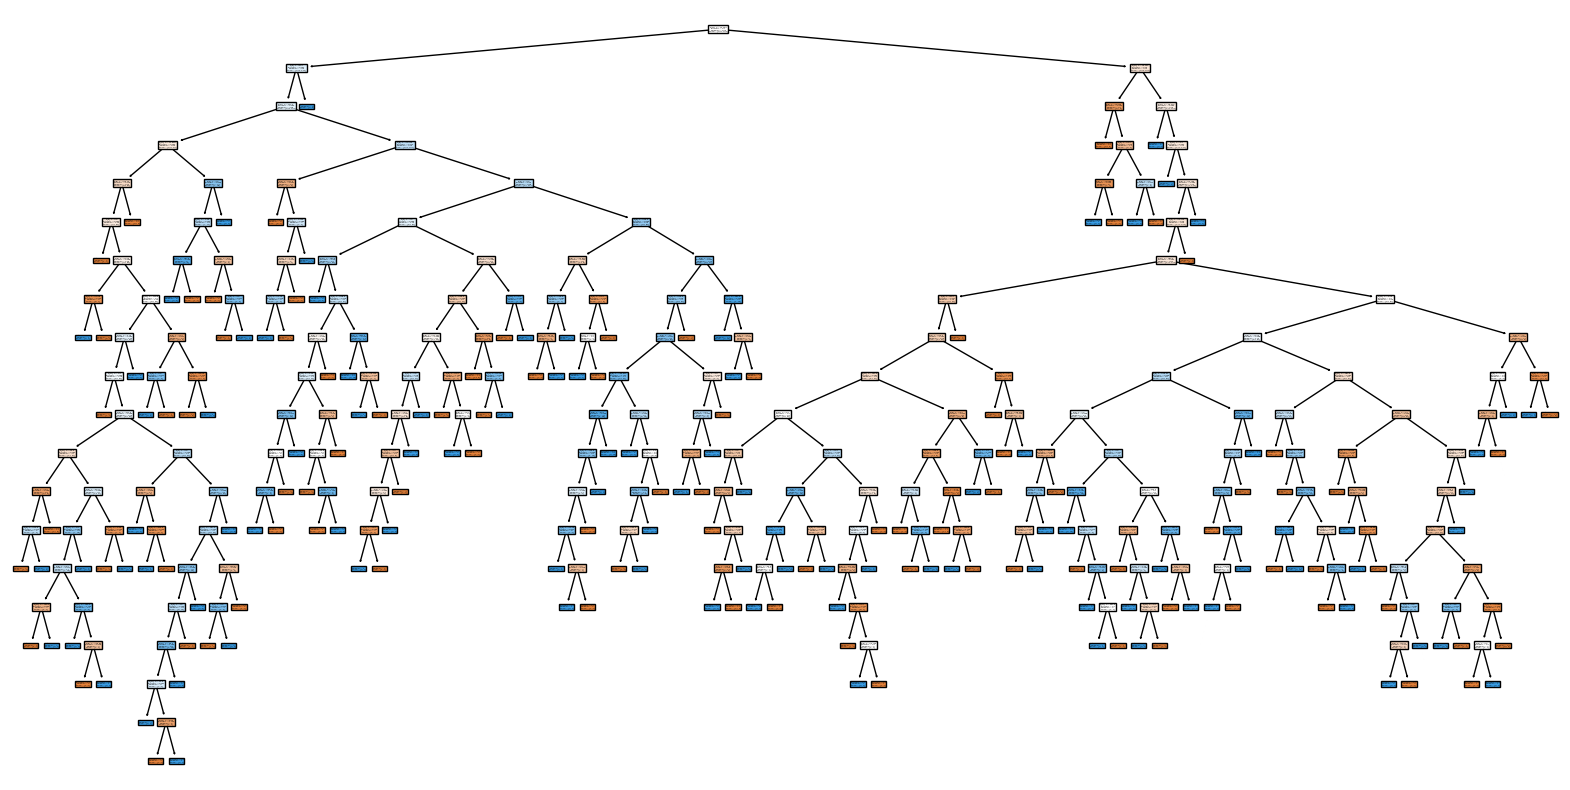

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Fit the model using the training data (x_train and y_train)
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=None)
plt.show()

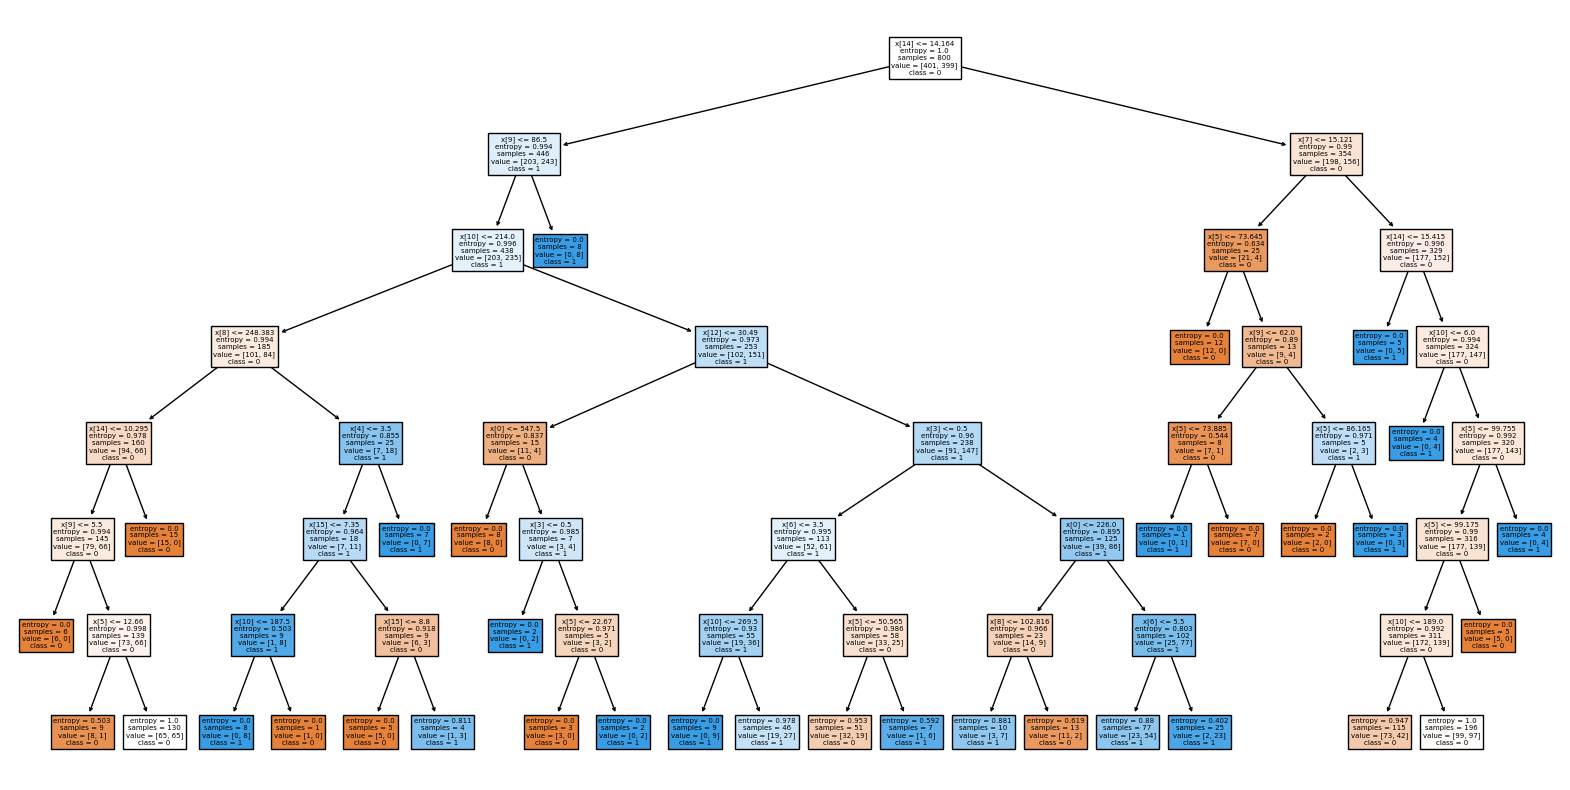

In [67]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
model.fit(x_train, y_train)

class_names = [str(class_label) for class_label in model.classes_]

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=None, class_names=class_names)
plt.savefig('decision_tree.png')
plt.show()

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your DecisionTreeRegressor model as in your code
model = DecisionTreeRegressor(criterion='squared_error', max_depth=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2*100, "%")
print("=" * 70)

Mean Squared Error (MSE): 0.3529535142501546
Mean Absolute Error (MAE): 0.5061494908253692
R-squared (R2) Score: -41.18140570006184 %


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your DecisionTreeRegressor model as in your code
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2*100, "%")
print("=" * 70)

Mean Squared Error (MSE): 0.34295351425015463
Mean Absolute Error (MAE): 0.4961494908253692
R-squared (R2) Score: -37.18140570006185 %


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your DecisionTreeRegressor model as in your code
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2*100, "%")
print("=" * 70)

Mean Squared Error (MSE): 0.3529535142501546
Mean Absolute Error (MAE): 0.5061494908253692
R-squared (R2) Score: -41.18140570006184 %
